# Steps for Regression Model with Statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("https://github.com/ybifoundation/Dataset/raw/main/Fish.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  159 non-null    int64  
 1   Species   159 non-null    object 
 2   Weight    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Length1   159 non-null    float64
 6   Length2   159 non-null    float64
 7   Length3   159 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.1+ KB


In [ ]:
dataset.describe()

,Category,Weight,Height,Width,Length1,Length2,Length3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,3.264151,398.326415,8.970994,4.417486,26.247170,28.415723,31.227044
std,1.704249,357.978317,4.286208,1.685804,9.996441,10.716328,11.610246
min,1.000000,0.000000,1.728400,1.047600,7.500000,8.400000,8.800000
25%,2.000000,120.000000,5.944800,3.385650,19.050000,21.000000,23.150000
50%,3.000000,273.000000,7.786000,4.248500,25.200000,27.300000,29.400000
75%,4.500000,650.000000,12.365900,5.584500,32.700000,35.500000,39.650000
max,7.000000,1650.000000,18.957000,8.142000,59.000000,63.400000,68.000000


In [ ]:
dataset.columns

Index(['Category', 'Species', 'Weight', 'Height', 'Width', 'Length1',
       'Length2', 'Length3'],
      dtype='object')

In [ ]:
Y = dataset['Weight']

In [ ]:
X = dataset.drop(['Category', 'Species', 'Weight'], axis=1)
X

,Height,Width,Length1,Length2,Length3
0,11.5200,4.0200,23.2,25.4,30.0
1,12.4800,4.3056,24.0,26.3,31.2
2,12.3778,4.6961,23.9,26.5,31.1
3,12.7300,4.4555,26.3,29.0,33.5
4,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...
154,2.0904,1.3936,11.5,12.2,13.4
155,2.4300,1.2690,11.7,12.4,13.5
156,2.2770,1.2558,12.1,13.0,13.8
157,2.8728,2.0672,13.2,14.3,15.2


In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Height,Width,Length1,Length2,Length3
0,1.0,11.5200,4.0200,23.2,25.4,30.0
1,1.0,12.4800,4.3056,24.0,26.3,31.2
2,1.0,12.3778,4.6961,23.9,26.5,31.1
3,1.0,12.7300,4.4555,26.3,29.0,33.5
4,1.0,12.4440,5.1340,26.5,29.0,34.0
...,...,...,...,...,...,...
154,1.0,2.0904,1.3936,11.5,12.2,13.4
155,1.0,2.4300,1.2690,11.7,12.4,13.5
156,1.0,2.2770,1.2558,12.1,13.0,13.8
157,1.0,2.8728,2.0672,13.2,14.3,15.2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 2529)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((127, 6), (32, 6), (127,), (32,))

In [ ]:
model = sm.OLS(y_train, x_train).fit()

In [ ]:
y_pred = model.predict(x_test)
y_pred

6      487.087630
54     507.371330
80      99.590451
138    870.433825
91     189.620419
48     220.814003
52     326.461560
103    382.882939
57     376.920144
149   -181.543174
153   -160.874874
108    461.381777
90     167.721031
118    858.056590
131    582.487455
100    306.884735
15     598.598616
46     198.836491
132    638.016355
79      96.515719
64     152.882977
35    -100.886210
133    621.421028
116    810.836500
31     813.864879
146   -203.013070
53     334.158367
28     716.235323
1      357.834713
117    798.472381
9      530.371563
12     546.911012
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [ ]:
mean_squared_error(y_test, y_pred)

18261.4844874483

In [ ]:
mean_absolute_error(y_test, y_pred)

107.7137888919807

In [ ]:
mean_absolute_percentage_error(y_test, y_pred)

2.409692919458707

In [ ]:
r2_score(y_test, y_pred)

0.7446315834133945

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     215.7
Date:                Fri, 29 Apr 2022   Prob (F-statistic):           1.67e-58
Time:                        11:18:47   Log-Likelihood:                -787.26
No. Observations:                 127   AIC:                             1587.
Df Residuals:                     121   BIC:                             1604.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -514.9714     31.975    -16.106      0.0

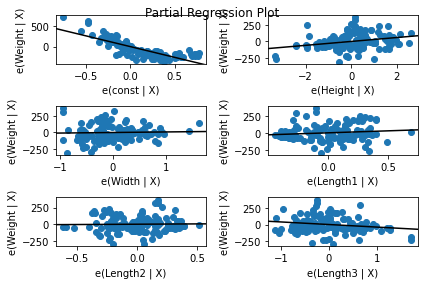

In [ ]:
fig = sm.graphics.plot_partregress_grid(model)

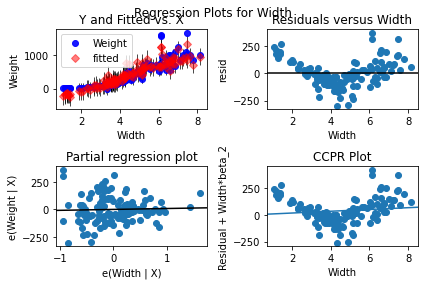

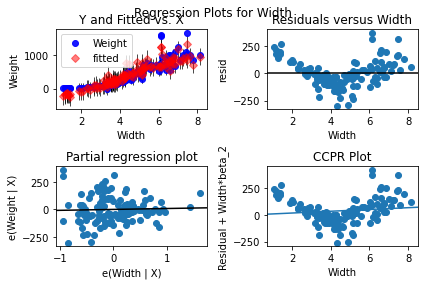

In [ ]:
sm.graphics.plot_regress_exog(model, 'Width')

In [ ]:
df = dataset.sample(1)

In [ ]:
x_new = df.drop(['Category', 'Species', 'Weight'], axis = 1)

In [ ]:
x_new = sm.add_constant(x_new, has_constant='add')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
y_pred_new = model.predict(x_new)
y_pred_new

125    943.903576
dtype: float64